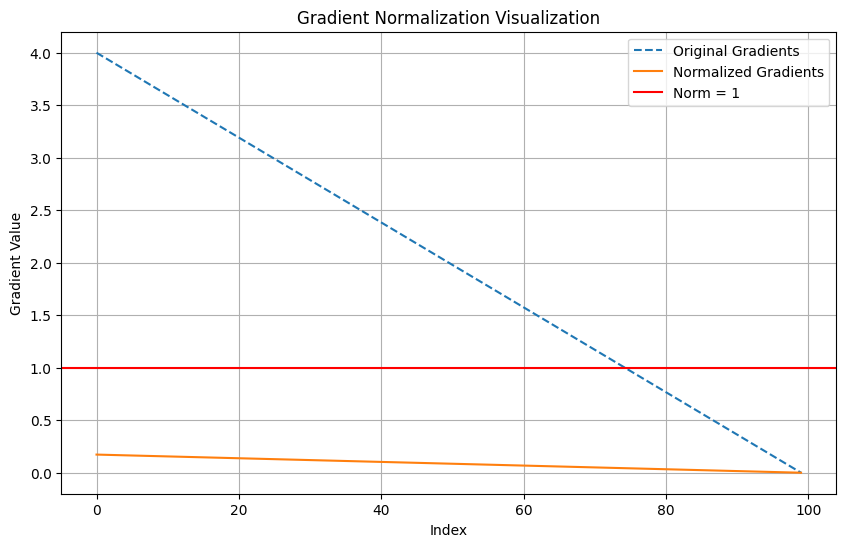

In [24]:
import torch
import matplotlib.pyplot as plt

# Generate random gradients from 4 to 0
grads = torch.linspace(4, 0, 100)

# Normalize gradients to have a norm of 1
norm = grads.norm()
normalized_grads = grads / norm

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(grads.tolist(), label='Original Gradients', linestyle='--')
plt.plot(normalized_grads.tolist(), label='Normalized Gradients', linestyle='-')
plt.axhline(y=1, color='r', linestyle='-', label='Norm = 1')
plt.xlabel('Index')
plt.ylabel('Gradient Value')
plt.title('Gradient Normalization Visualization')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
gradients

tensor([ 4.9635,  4.7032,  4.3696,  2.8260,  4.1776,  3.1807,  3.7360,  2.9148,
         3.3007,  4.4607,  3.3997,  2.8538,  3.1512,  3.1950,  3.0499,  3.7752,
         4.1747,  3.2333,  3.0240,  3.4521,  2.8129,  3.6907,  3.5115,  3.9110,
         3.6699,  3.6381,  3.2547,  3.5765,  2.7529,  2.8492,  2.6621,  3.1774,
         2.0147,  2.2310,  2.5146,  3.4445,  2.7049,  2.2928,  2.6175,  2.0369,
         1.6051,  2.8413,  1.8631,  1.9621,  1.5851,  3.2432,  1.5241,  1.8571,
         1.6037,  1.6911,  2.0188,  2.2023,  1.6550,  2.4543,  1.4112,  1.4098,
         1.0357,  1.7150,  1.6248,  1.9540,  1.5269,  2.4577,  0.9027,  2.1463,
         2.1367,  1.8019,  2.4424,  1.5545,  1.4258,  1.1135,  0.6444,  1.7703,
         1.0048,  1.3124,  1.0384,  1.1828,  1.2168,  0.5680, -0.2547,  0.4327,
         0.7731,  0.5579,  0.0165,  0.3538,  0.9264,  0.8573,  1.0587,  0.2598,
         0.1051,  0.6912,  0.4575,  0.1444,  0.4153,  0.8790,  0.2014,  0.0098,
        -0.3720,  0.1425,  0.2153,  0.30

In [19]:
# Perform gradient clipping
max_norm = 1.0
clipped_gradients = torch.nn.utils.clip_grad_norm_(gradients, max_norm)

# Calculate the magnitude of the clipped gradients
clipped_magnitudes = torch.norm(clipped_gradients, dim=0)

In [20]:
gradients

tensor([ 4.9635,  4.7032,  4.3696,  2.8260,  4.1776,  3.1807,  3.7360,  2.9148,
         3.3007,  4.4607,  3.3997,  2.8538,  3.1512,  3.1950,  3.0499,  3.7752,
         4.1747,  3.2333,  3.0240,  3.4521,  2.8129,  3.6907,  3.5115,  3.9110,
         3.6699,  3.6381,  3.2547,  3.5765,  2.7529,  2.8492,  2.6621,  3.1774,
         2.0147,  2.2310,  2.5146,  3.4445,  2.7049,  2.2928,  2.6175,  2.0369,
         1.6051,  2.8413,  1.8631,  1.9621,  1.5851,  3.2432,  1.5241,  1.8571,
         1.6037,  1.6911,  2.0188,  2.2023,  1.6550,  2.4543,  1.4112,  1.4098,
         1.0357,  1.7150,  1.6248,  1.9540,  1.5269,  2.4577,  0.9027,  2.1463,
         2.1367,  1.8019,  2.4424,  1.5545,  1.4258,  1.1135,  0.6444,  1.7703,
         1.0048,  1.3124,  1.0384,  1.1828,  1.2168,  0.5680, -0.2547,  0.4327,
         0.7731,  0.5579,  0.0165,  0.3538,  0.9264,  0.8573,  1.0587,  0.2598,
         0.1051,  0.6912,  0.4575,  0.1444,  0.4153,  0.8790,  0.2014,  0.0098,
        -0.3720,  0.1425,  0.2153,  0.30

In [ ]:
# Create the plot
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=list(range(num_points)), y=gradients.tolist(), name="Original Gradients"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=list(range(num_points)), y=clipped_magnitudes.tolist(), name="Clipped Gradients"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=[0, num_points-1], y=[max_norm, max_norm], name="Clipping Threshold",
               line=dict(color="red", dash="dash")),
    secondary_y=False,
)

# Update layout
fig.update_layout(
    title="Effect of Gradient Clipping (Max Norm = 1.0)",
    xaxis_title="Gradient Index",
    yaxis_title="Gradient Magnitude",
    legend_title="Legend",
    hovermode="x unified"
)

# Update y-axis
fig.update_yaxes(title_text="Gradient Magnitude", secondary_y=False)

# Show the plot
fig.show()

# Save the plot as an HTML file
fig.write_html("gradient_clipping_visualization.html")

print("Interactive visualization saved as 'gradient_clipping_visualization.html'")